In [231]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [232]:
df = pd.read_csv('titanic_train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [233]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [234]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [235]:
df.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

# Data Preprocessing

In [236]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [237]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [238]:
df.shape

(891, 12)

In [239]:
df.duplicated().sum()

0

In [240]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [241]:
# Remove missing values

df = df.drop(columns = 'Cabin',axis = 1)

In [244]:
# replacing the missing values in age by mean value in age column

df['Age'].fillna( method ='ffill', inplace = True)

df = df.astype({"Age":'int'})  

df['Age']


0      22
1      38
2      26
3      35
4      35
5      35
6      54
7       2
8      27
9      14
10      4
11     58
12     20
13     39
14     14
15     55
16      2
17      2
18     31
19     31
20     35
21     34
22     15
23     28
24      8
25     38
26     38
27     19
28     19
29     19
       ..
861    21
862    48
863    48
864    24
865    42
866    27
867    31
868    31
869     4
870    26
871    47
872    33
873    47
874    28
875    15
876    20
877    19
878    19
879    56
880    25
881    33
882    22
883    28
884    25
885    39
886    27
887    19
888    19
889    26
890    32
Name: Age, Length: 891, dtype: int32

In [245]:
df.shape

(891, 11)

In [246]:
df.groupby('Survived').mean()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
Survived,,,,,,
0,447.016393,2.531876,30.313297,0.553734,0.329690,22.117887
1,444.368421,1.950292,28.353801,0.473684,0.464912,48.395408


In [247]:
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.026624,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.065452,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.291179,0.083081,0.018443,-0.549500
Age,0.026624,-0.065452,-0.291179,1.000000,-0.205739,-0.165233,0.083532
SibSp,-0.057527,-0.035322,0.083081,-0.205739,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.165233,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.083532,0.159651,0.216225,1.000000


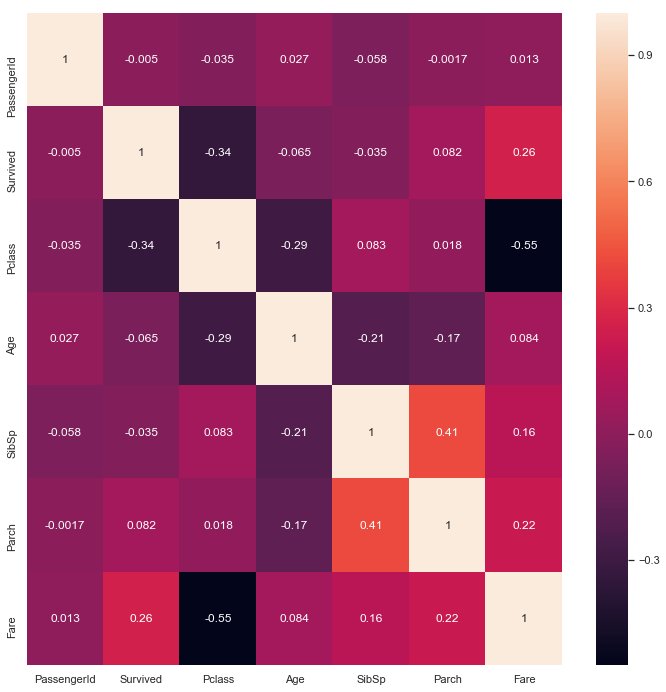

In [248]:
# Heatmap
plt.figure(figsize=(12,12))

sns.heatmap(df.corr(),annot=True)

In [249]:
# finding the number of people survived and not survived

df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

# Data Visualization

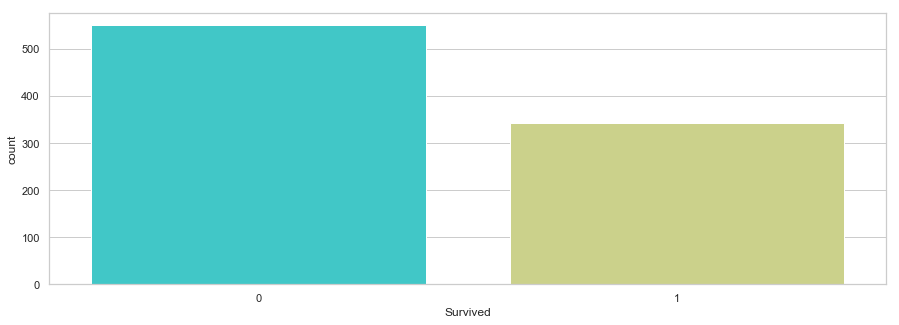

In [250]:
# countplot for death and survival rate
sns.set_style("whitegrid")
sns.countplot(x = "Survived", data = df, palette = 'rainbow')

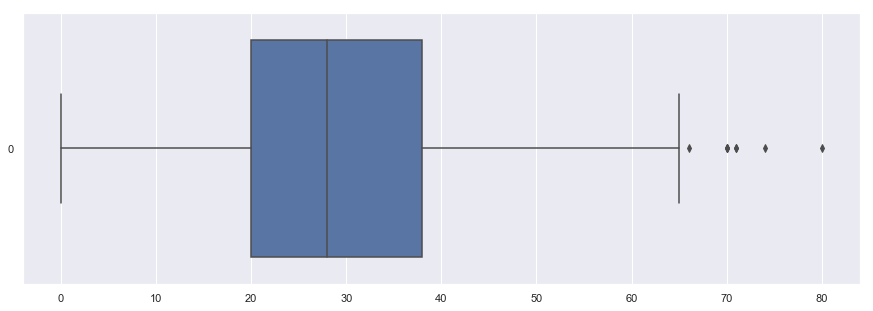

In [251]:
# Box plot

sns.set(rc={'figure.figsize':(15,5)})
sns.boxplot(data=df['Age'], orient="h")

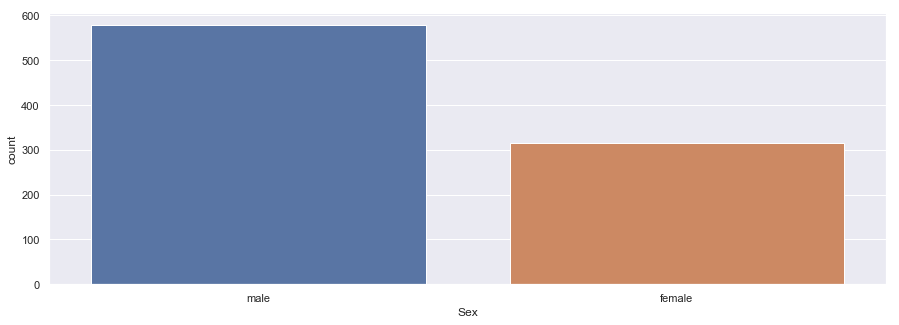

In [252]:
sns.countplot(df.Sex)

In [253]:
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

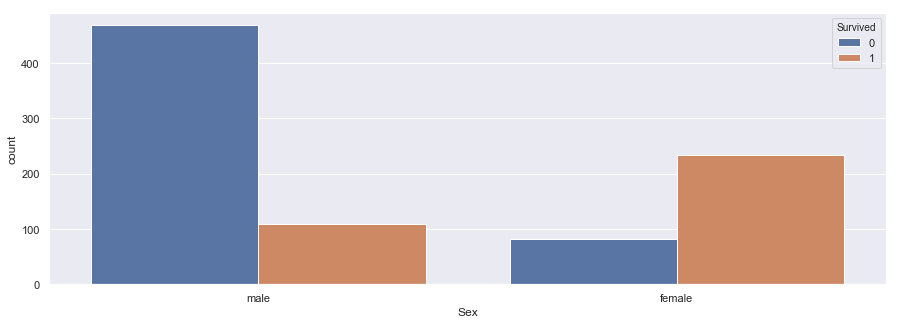

In [254]:
# classifying survived people on basis on gender

sns.countplot("Sex", hue = "Survived", data = df)
plt.show()


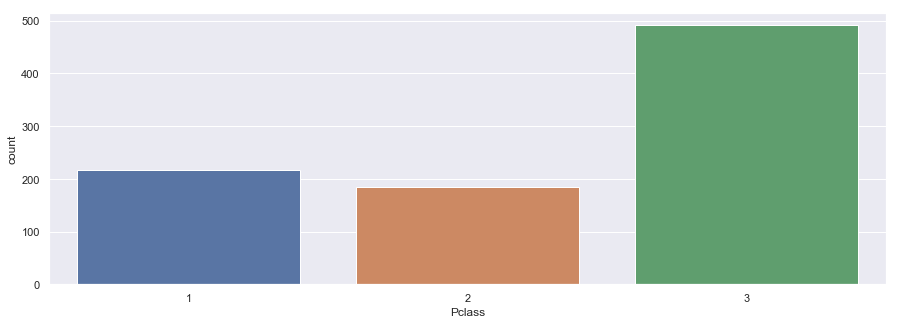

In [255]:
# making a count plot for "PClass" columns

sns.countplot("Pclass", data = df)

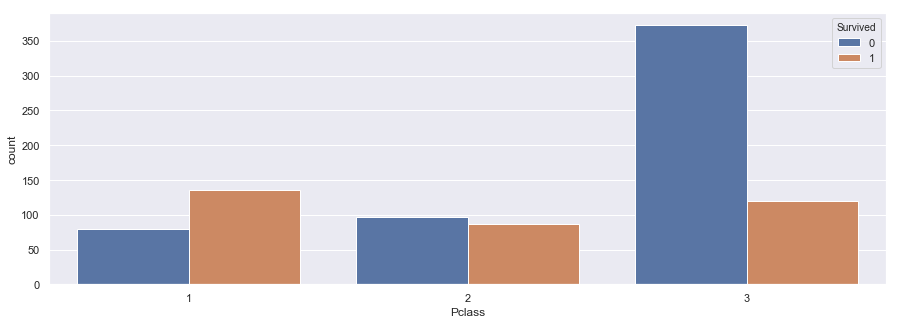

In [256]:
sns.countplot("Pclass", hue = "Survived", data = df)

In [257]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [267]:

df['Embarked'].fillna( method ='ffill', inplace = True)
df = df.astype({"Embarked":'int'})  

df.Embarked

0      0
1      1
2      0
3      0
4      0
5      2
6      0
7      0
8      0
9      1
10     0
11     0
12     0
13     0
14     0
15     0
16     2
17     0
18     0
19     1
20     0
21     0
22     2
23     0
24     0
25     0
26     1
27     0
28     2
29     0
      ..
861    0
862    0
863    0
864    0
865    0
866    1
867    0
868    0
869    0
870    0
871    0
872    0
873    0
874    1
875    1
876    0
877    0
878    0
879    1
880    0
881    0
882    0
883    0
884    0
885    2
886    0
887    0
888    0
889    1
890    2
Name: Embarked, Length: 891, dtype: int32

In [270]:
df.Sex

0      0
1      1
2      1
3      1
4      0
5      0
6      0
7      0
8      1
9      1
10     1
11     1
12     0
13     0
14     1
15     1
16     0
17     0
18     1
19     1
20     0
21     0
22     1
23     0
24     1
25     1
26     0
27     0
28     1
29     0
      ..
861    0
862    1
863    1
864    0
865    1
866    1
867    0
868    0
869    0
870    0
871    1
872    0
873    0
874    1
875    1
876    0
877    0
878    0
879    1
880    1
881    0
882    1
883    0
884    0
885    1
886    0
887    1
888    1
889    0
890    0
Name: Sex, Length: 891, dtype: int64

In [271]:
display(df.dtypes) 

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex              int64
Age              int32
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked         int32
dtype: object

In [272]:
df.Sex

0      0
1      1
2      1
3      1
4      0
5      0
6      0
7      0
8      1
9      1
10     1
11     1
12     0
13     0
14     1
15     1
16     0
17     0
18     1
19     1
20     0
21     0
22     1
23     0
24     1
25     1
26     0
27     0
28     1
29     0
      ..
861    0
862    1
863    1
864    0
865    1
866    1
867    0
868    0
869    0
870    0
871    1
872    0
873    0
874    1
875    1
876    0
877    0
878    0
879    1
880    1
881    0
882    1
883    0
884    0
885    1
886    0
887    1
888    1
889    0
890    0
Name: Sex, Length: 891, dtype: int64

In [273]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,35,0,0,373450,8.0500,0


# Split features and target

In [274]:
X = df.drop(columns = ['PassengerId', 'Name','Ticket','Survived'], axis = 1)
Y = df['Survived']

In [275]:
X.dtypes

Pclass        int64
Sex           int64
Age           int32
SibSp         int64
Parch         int64
Fare        float64
Embarked      int32
dtype: object

In [276]:
print(X)

     Pclass  Sex  Age  SibSp  Parch      Fare  Embarked
0         3    0   22      1      0    7.2500         0
1         1    1   38      1      0   71.2833         1
2         3    1   26      0      0    7.9250         0
3         1    1   35      1      0   53.1000         0
4         3    0   35      0      0    8.0500         0
5         3    0   35      0      0    8.4583         2
6         1    0   54      0      0   51.8625         0
7         3    0    2      3      1   21.0750         0
8         3    1   27      0      2   11.1333         0
9         2    1   14      1      0   30.0708         1
10        3    1    4      1      1   16.7000         0
11        1    1   58      0      0   26.5500         0
12        3    0   20      0      0    8.0500         0
13        3    0   39      1      5   31.2750         0
14        3    1   14      0      0    7.8542         0
15        2    1   55      0      0   16.0000         0
16        3    0    2      4      1   29.1250   

In [277]:
X.dtypes

Pclass        int64
Sex           int64
Age           int32
SibSp         int64
Parch         int64
Fare        float64
Embarked      int32
dtype: object

In [278]:
print(Y)

0      0
1      1
2      1
3      1
4      0
5      0
6      0
7      0
8      1
9      1
10     1
11     1
12     0
13     0
14     0
15     1
16     0
17     1
18     0
19     1
20     0
21     1
22     1
23     1
24     0
25     1
26     0
27     0
28     1
29     0
      ..
861    0
862    1
863    0
864    0
865    1
866    1
867    0
868    0
869    1
870    0
871    1
872    0
873    0
874    1
875    1
876    0
877    0
878    0
879    1
880    1
881    0
882    0
883    0
884    0
885    0
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


In [279]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 2)

In [280]:
print("Shape of X_train : ", X_train.shape)
print("Shape of X_test : ", X_test.shape)
print("Shape of Y_train : ", Y_train.shape)
print("Shape of Y_test : ", Y_test.shape)

Shape of X_train :  (712, 7)
Shape of X_test :  (179, 7)
Shape of Y_train :  (712,)
Shape of Y_test :  (179,)


# Model Training

In [281]:
# training the logistic regression model with training data

model = LogisticRegression()
model.fit(X_train, Y_train)
     

LogisticRegression()

# Model Evaluation

In [282]:
# accuracy score on training data

X_train_prediction = model.predict(X_train)
print(X_train_prediction)
     

[0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 1
 0 1 0 0 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 1 0 0 1 1 0 0 1 1 0 1 0 0 1
 0 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 1 1 1 0 1 0 0 0 0 0 1 0 0 0
 1 1 0 0 1 0 0 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 1 1 1 1 1 0 0 1 1 1 0 0 1 0 0
 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 1 1
 0 0 0 1 0 0 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 1 1 0 0 1 1 1 0 0 0 0 0 0 0
 0 1 0 0 0 1 1 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0
 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 1 0 1 0 0 1 0 0 0 1 0 0 0
 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 1 0 0 0 1 0 1 0 0 0 0 1 0 1 1 0 1 1
 0 1 0 1 0 0 0 0 0 0 0 1 0 1 0 0 1 1 1 0 1 0 0 0 0 1 1 0 0 0 1 0 1 1 1 0 0
 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 1 1 0 1 1 0 0 0
 0 1 0 1 0 0 1 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 1 0 0
 1 0 1 0 0 1 0 0 0 1 0 0 0 0 1 0 0 1 1 0 0 0 0 1 0 1 0 0 1 0 0 0 1 1 0 1 0
 0 0 0 0 1 0 0 1 1 1 1 0 

In [283]:
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)
print("Accuracy score of training data : ", training_data_accuracy)

Accuracy score of training data :  0.8075842696629213


In [284]:
X_test_prediction = model.predict(X_test)
print(X_test_prediction)

[0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 1 1 0 1 0 1 1 0 0 0 0 0 0 1 0 1 1
 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 1 0 1 0
 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 1 0 0 1 0 1 1 0 1 1 1 0 0 0
 0 0 0 1 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 0 0 1 1 1 1 0 1 0 0
 0 1 0 0 0 0 1 0 0 1 1 0 1 0 0 0 1 1 0 0 1 0 0 1 1 1 0 0 0 0 0]


In [285]:
testing_data_accuracy = accuracy_score(Y_test, X_test_prediction)
print("Accuracy score of training data : ", testing_data_accuracy)

Accuracy score of training data :  0.776536312849162
